In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

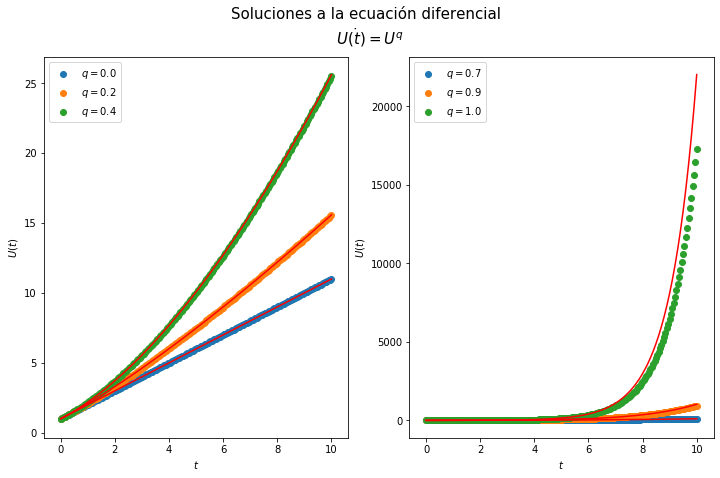

In [2]:
#Punto 1
q = np.array([0., 0.2, 0.4, 0.7, 0.9, 1.])
t = np.linspace(0,10,200)
h = t[1]-t[0]

def dU(u,q):
    return u**q

#Soluciones analíticas
def sol1(t):
    return np.exp(t)

def sol2(t,q):
    return (t*(1-q)+1)**(1/(1-q))

#Solucionando por diferencias finitas
def solDF(t,q):
    sol = np.zeros(len(t))
    sol[0] = 1
    
    for i in range(1,len(t)):
        sol[i] = dU(sol[i-1],q)*h + sol[i-1]
        
    return sol

figP1 = plt.figure(figsize=(12,7))
figP1.suptitle("Soluciones a la ecuación diferencial \n $\dot{U(t)} = U^q$",fontsize=15)
grP1 = figP1.add_subplot(121)
grP1.set_xlabel("$t$")
grP1.set_ylabel("$U(t)$")
grP12 = figP1.add_subplot(122)
grP12.set_xlabel("$t$")
grP12.set_ylabel("$U(t)$")

for i in range(3):
    grP1.scatter(t,solDF(t,q[i]),label="$q = {}$".format(q[i]))
    grP1.plot(t,sol2(t,q[i]),c="red")
    grP1.legend()
    
for i in range(3,5):
    grP12.scatter(t,solDF(t,q[i]),label="$q = {}$".format(q[i]))
    grP12.plot(t,sol2(t,q[i]),c="red")
    grP12.legend() 
    
grP12.scatter(t,solDF(t,q[-1]),label="$q = {}$".format(q[-1]))
grP12.plot(t,sol1(t),c="red")
grP12.legend()
    

<strong>Notas punto 1:</strong> <br>
1: El método de diferencias finitas no es el más preciso en general, aunque para resolver ecuaciones no lineales funciona muy bien. <br>
2: Las lineas rojas en las gráficas representan las soluciones analíticas.

In [3]:
#Punto 2
t = sy.Symbol("t",real=True)
h = sy.Symbol("h", real = True)
    
#Polinomio de Lagrange
def lagrange(i,k,bash):
    inicial = 1
    
    if bash == True: #Método de Adams-Bashforth
        for j in range(k):
            if (j != i):
                a = (j-i)*h
                inicial*= (t + j*h)/(a)     
                
    else: #Método de Adams-Moulton
        for j in range(k):
            if (j != i):
                a = (i-j)*h
                inicial*= (t - j*h)/(a)  
            
    return inicial
    
#Polinomio intepolador
def interp(k,bash):
    inicial = 0
    
    for i in range(k):
        inicial += sy.Symbol("f_n-{}".format(i))*lagrange(i,k,bash)
    
    return inicial

AB3 = sy.integrate(interp(3,True),(t,0,h)).expand().factor()
AB4 = sy.integrate(interp(4,True),(t,0,h)).expand().factor()
AB = [AB3,AB4]

AM3 = sy.integrate(interp(3,False),(t,0,h)).expand().factor()
AM4 = sy.integrate(interp(4,False),(t,0,h)).expand().factor()
AM = [AM3,AM4]

print("Coeficientes Adams-Bashforth")
for i in range(len(AB)):
    print("Grado {}:".format(i+3), AB[i])

print("\n")

print("Coeficientes Adams-Moulton")
for i in range(len(AM)):
    print("Grado {}:".format(i+3), AM[i])

Coeficientes Adams-Bashforth
Grado 3: h*(23*f_n-0 - 16*f_n-1 + 5*f_n-2)/12
Grado 4: h*(55*f_n-0 - 59*f_n-1 + 37*f_n-2 - 9*f_n-3)/24


Coeficientes Adams-Moulton
Grado 3: h*(5*f_n-0 + 8*f_n-1 - f_n-2)/12
Grado 4: h*(9*f_n-0 + 19*f_n-1 - 5*f_n-2 + f_n-3)/24


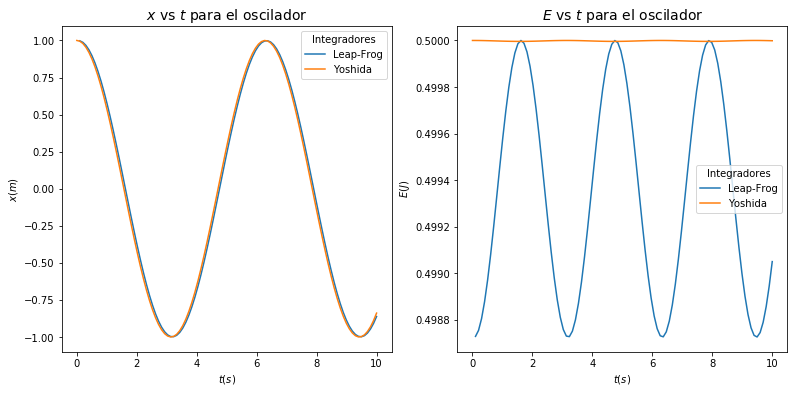

In [31]:
#Punto 4
#Coeficientes grado 4
c14 = 1/(2*(2-(2)**(1/3)))
c23 = (1-(2)**(1/3))/(2*(2-(2)**(1/3)))
c = np.array([c14,c23,c23,c14])

d13 = 1/(2-(2)**(1/3))
d2 = (-2**(1/3))/(2-(2)**(1/3))
d4 = 0
d = np.array([d13,d2,d13,d4])

#Condiciones iniciales y aceleracion
r0 = [1,0]
t = np.linspace(0,10,100)

def ac(x):
    return -x

#Implementando el integrador de cuarto orden
def yoshida():
    dt = t[1]-t[0]
    x = np.zeros(len(t))
    v = np.zeros(len(t))
    x[0] = r0[0]
    v[0] = r0[1]
    
    for i in range(1,len(x)):
        x1 = x[i-1] + c[0]*v[i-1]*dt
        v1 = v[i-1] + d[0]*ac(x1)*dt
        
        x2 = x1 + c[1]*v1*dt
        v2 = v1 + d[1]*ac(x2)*dt
        
        x3 = x2 + c[2]*v2*dt
        v3 = v2 + d[2]*ac(x3)*dt
        
        x4 = x3 + c[3]*v3*dt
        v4 = v3 + d[3]*ac(x4)*dt
        
        x[i] = x4
        v[i] = v4
        
    return x,v

xY,vY = yoshida()
eY = 0.5*xY**2+0.5*vY**2

#Comparando con Leap-Frog (tomado del GitHub de la clase)
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(t[0] - 0.5*h, t[-1] - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*ac(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*ac(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    return X,V

xLF, vLF = GetLeapFrog(r0,t)
eLF = 0.5*xLF**2+0.5*vLF**2

figP4 = plt.figure(figsize=(13,6))
grP4 = figP4.add_subplot(121)
grP4.set_title("$x$ vs $t$ para el oscilador",fontsize=14)
grP4.plot(t[1::],xLF,label="Leap-Frog")
grP4.plot(t,xY,label="Yoshida")
grP4.set_xlabel("$t (s)$")
grP4.set_ylabel("$x (m)$")
grP4.legend(title="Integradores")

grP42 = figP4.add_subplot(122)
grP42.set_title("$E$ vs $t$ para el oscilador",fontsize=14)
grP42.plot(t[1::],eLF,label="Leap-Frog")
grP42.plot(t,eY,label="Yoshida")
grP42.set_xlabel("$t (s)$")
grP42.set_ylabel("$E (J)$")
grP42.legend(title="Integradores")